In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import *
from rulebased_classifier import RuleBasedClassifier

In [2]:
with open("wdbc.pkl", "rb") as f: 
    data = pickle.load(f)

print(type(data)) 
print(data.shape) 


<class 'pandas.core.frame.DataFrame'>
(569, 32)


<Axes: xlabel='malignant'>

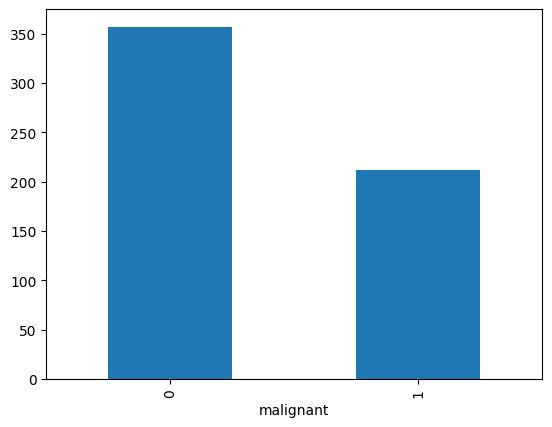

In [3]:
data['malignant'].value_counts().plot(kind='bar')

In [4]:
data.columns

Index(['id', 'malignant', 'radius_0', 'texture_0', 'perimeter_0', 'area_0',
       'smoothness_0', 'compactness_0', 'concavity_0', 'concave points_0',
       'symmetry_0', 'fractal dimension_0', 'radius_1', 'texture_1',
       'perimeter_1', 'area_1', 'smoothness_1', 'compactness_1', 'concavity_1',
       'concave points_1', 'symmetry_1', 'fractal dimension_1', 'radius_2',
       'texture_2', 'perimeter_2', 'area_2', 'smoothness_2', 'compactness_2',
       'concavity_2', 'concave points_2', 'symmetry_2', 'fractal dimension_2'],
      dtype='object')

    a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values) : Measures how intensity (brightness) varies across the nucleus in an image.
	c) perimeter : Measures the total boundary length of the nucleus.
	d) area : A larger area suggests an abnormally growing cell (common in cancerous cells)
	e) smoothness (local variation in radius lengths) : A high smoothness value means a more uniform shape, while a low smoothness value means the edges are highly irregular.
	f) compactness (perimeter^2 / area - 1.0) : Higher compactness suggests an irregular or elongated shape, which is more common in cancerous cells.
	g) concavity (severity of concave portions of the contour) : Higher concavity means the nucleus has deeper and more severe indentations 
	h) concave points (number of concave portions of the contour) : More concave points suggest irregular growth patterns, often seen in cancerous cells.
	i) symmetry : Normal cells tend to be highly symmetrical, while cancerous cells often exhibit asymmetry.
	j) fractal dimension ("coastline approximation" - 1) : A higher fractal dimension suggests a more complex, irregular shape

| **Feature**           | **What It Measures**           | **Normal Cell Behavior**   | **Cancerous Cell Behavior**   |
|----------------------|-----------------------------|--------------------------|-----------------------------|
| **Radius**           | Size of the nucleus         | Small, uniform          | Larger, irregular         |
| **Texture**         | Variation in brightness      | Smooth intensity        | High variability          |
| **Perimeter**       | Length of boundary          | Shorter, round shape    | Longer, irregular shape   |
| **Area**            | Total size                   | Smaller                 | Larger                    |
| **Smoothness**      | Edge uniformity             | Smooth                  | Irregular edges           |
| **Compactness**     | Shape density               | Dense, circular         | More stretched or jagged  |
| **Concavity**       | Depth of inward curves      | Few or none             | Deep indentations         |
| **Concave Points**  | Number of inward curves     | Few                     | Many                      |
| **Symmetry**        | Balance of shape            | Symmetrical             | Asymmetrical              |
| **Fractal Dimension** | Irregularity of edges     | Low                     | High                      |


size = area, perimeter, radius
shape = smoothness, concavity, concave points
texture = texture
homog = symmetry

In [5]:
data = data.drop(['id'], axis=1)
patient_X, patient_y = data.drop(['malignant'], axis=1), data['malignant']
patient_X, patient_X_test, patient_y, patient_y_test = train_test_split(patient_X, patient_y, test_size=0.1, random_state=42)

patient_df = pd.concat([patient_X, patient_y], axis=1)
patient_test = pd.concat([patient_X_test, patient_y_test], axis=1)


In [6]:
patient_df[patient_df['malignant'] == 1].describe()

,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,fractal dimension_0,...,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2,malignant
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.0
mean,17.420872,21.572359,115.079128,975.335897,0.102842,0.145239,0.160762,0.087377,0.193436,0.062737,...,29.368769,140.954923,1417.431282,0.145154,0.376601,0.453310,0.182564,0.325534,0.091672,1.0
std,3.269915,3.797949,22.250138,376.680538,0.012760,0.054032,0.074483,0.033938,0.027937,0.007754,...,5.466704,29.856239,612.402699,0.022298,0.168342,0.179633,0.046398,0.076391,0.021871,0.0
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040,1.0
25%,14.970000,19.270000,97.405000,691.900000,0.093940,0.110450,0.110850,0.063990,0.174900,0.056525,...,25.785000,118.250000,941.450000,0.131050,0.253500,0.331400,0.153800,0.279950,0.076285,1.0
50%,17.300000,21.430000,113.400000,930.900000,0.101800,0.133600,0.151900,0.086530,0.190700,0.061320,...,29.250000,136.800000,1302.000000,0.143500,0.358300,0.410700,0.182000,0.312600,0.088150,1.0
75%,19.590000,23.655000,129.950000,1204.500000,0.110950,0.169850,0.200550,0.101800,0.210100,0.067510,...,32.210000,158.800000,1702.500000,0.156250,0.448000,0.557050,0.210850,0.361300,0.102850,1.0
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500,1.0


In [7]:
patient_df[patient_df['malignant'] == 0].describe()

,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,fractal dimension_0,...,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2,malignant
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,...,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.0
mean,12.173842,17.894921,78.248265,465.089590,0.091880,0.079642,0.046449,0.025466,0.173081,0.062783,...,23.537098,87.291009,562.298423,0.124248,0.182676,0.168400,0.074579,0.269338,0.079526,0.0
std,1.793027,3.985937,11.894030,135.785508,0.013062,0.034333,0.044886,0.015716,0.024648,0.006781,...,5.513397,13.677011,165.936074,0.019966,0.092941,0.144188,0.036329,0.041295,0.014060,0.0
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,0.0
25%,11.080000,15.150000,70.870000,378.200000,0.082840,0.054920,0.020310,0.014730,0.157300,0.058350,...,19.590000,78.280000,450.000000,0.110100,0.110900,0.076980,0.050520,0.240400,0.070070,0.0
50%,12.220000,17.310000,78.290000,461.000000,0.090570,0.074280,0.037350,0.023430,0.170900,0.061440,...,22.800000,86.970000,549.100000,0.123400,0.167900,0.142300,0.074850,0.268100,0.077220,0.0
75%,13.450000,19.730000,86.240000,553.500000,0.100400,0.097130,0.059880,0.032510,0.187900,0.065740,...,26.510000,97.110000,674.700000,0.136300,0.231500,0.222000,0.098040,0.297700,0.085240,0.0
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600,0.0


# Task 1

## RULE BASED CLASSIFIER 1

In [8]:
patient_X_train, patient_X_val, patient_y_train, patient_y_val = train_test_split(patient_X, patient_y, test_size=0.2, random_state=42)

patient_df_train = pd.concat([patient_X_train, patient_y_train], axis=1)
patient_df_val = pd.concat([patient_X_val, patient_y_val], axis=1)

In [9]:
size = ['area', 'perimeter', 'radius']
shape = ['smoothness', 'compactness', 'concavity', 'concave points']
texture = ['texture']
homog = ['symmetry', 'fractal dimension']
C = RuleBasedClassifier( size, shape, texture, homog, decision_option="all")

In [10]:
C.fit(patient_X_train, patient_y_train)

In [10]:
C.score(patient_X_val, patient_y_val)

(0.8640776699029126,
 0.7727272727272727,
 0.8947368421052632,
 0.8292682926829269,
 array([[55, 10],
        [ 4, 34]]))

In [12]:
C1 = RuleBasedClassifier( size, shape, texture, homog, decision_option="all")
C1.fit(patient_X, patient_y)
C1.score(patient_X, patient_y)

(0.84375,
 0.757847533632287,
 0.8666666666666667,
 0.8086124401913876,
 array([[263,  54],
        [ 26, 169]]))

## Rule based classifier v2

In [10]:
from rulebased_classifier_v2 import RuleBasedClassifierV2

In [11]:
patient_X_train, patient_X_val, patient_y_train, patient_y_val = train_test_split(patient_X, patient_y, test_size=0.2, random_state=42)

patient_df_train = pd.concat([patient_X_train, patient_y_train], axis=1)
patient_df_val = pd.concat([patient_X_val, patient_y_val], axis=1)

In [20]:
size = ['area', 'perimeter', 'radius']
shape = ['smoothness', 'compactness', 'concavity', 'concave points']
texture = ['texture']
homog = [ 'area', 'smoothness']

C = RuleBasedClassifierV2(size, shape, [], homog, decision_option="all")
C.fit(patient_X_train, patient_y_train)
accuracy, precision, recall, F1_score, confusion_matrix = C.score(patient_X_val, patient_y_val)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", F1_score)



Accuracy of RuleBasedClassifier: 0.9029126213592233

Confusion Matrix for RuleBasedClassifier:
[[58  7]
 [ 3 35]]

Classification Report for RuleBasedClassifier:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        65
           1       0.83      0.92      0.88        38

    accuracy                           0.90       103
   macro avg       0.89      0.91      0.90       103
weighted avg       0.91      0.90      0.90       103

Precision:  0.8333333333333334
Recall:  0.9210526315789473
F1 Score:  0.875


In [14]:
C.classifier_rules()

4 Category rules (in order):

Size:
 
	mean_area > 741.2049731051344
	mean_perimeter > 97.94879657701709
	mean_radius > 14.981424449877752

Shape:
 
	mean_smoothness > 0.10997531051344742
	mean_compactness > 0.1530570513447433
	mean_concavity > 0.149539388997555
	mean_concave points > 0.0716610097799511

No rules for size

Homogeneity:
 
	worst_area > 741.2049731051344
	worst_smoothness > 0.10997531051344742

Decision option: all. All conditions must be satisfied for a category rule to hold.
If at least one of the category rules is satisfied, the prediction is 1; otherwise, the prediction is 0.


In [11]:
constraints = [[[], shape, texture, homog] ,[size, [], texture, homog], 
               [size, shape, [], homog], [size, shape, texture, []], 
               [size, shape, texture, homog]]

options = ["all", "single", "majority"]


In [13]:
optimal_combination, best_model = custom_gridsearch(
    RuleBasedClassifierV2,  
    patient_X_train, patient_y_train, 
    patient_X_val, patient_y_val,
    constraints=constraints,
    decision_option=options
)

Processing: 100%|██████████| 15/15 [00:00<00:00, 112.20it/s]

Best Accuracy: 0.9029126213592233
Best F1: 0.875
Best Precision: 0.8333333333333334
Best Recall: 0.9210526315789473
Best Combination: ([['area', 'perimeter', 'radius'], ['smoothness', 'compactness', 'concavity', 'concave points'], [], ['area', 'smoothness']], 'all')


In [ ]:
import itertools
from tqdm import tqdm

best_accuracy = 0
best_f1 = 0
best_precision = 0
best_recall = 0
best_cm = None
best_model = None
optimal_combination = None
combinations = itertools.product(constraints, options)
n_combinations = len(constraints) * len(options)
pbar = tqdm(total=n_combinations, desc='Processing')

for combination in combinations:
    constraint, option = combination
    C = RuleBasedClassifierV2(*constraint, decision_option=option)
    C.fit(patient_X_train, patient_y_train)
    accuracy, precision, recall, f1, cm = C.score(patient_X_val, patient_y_val)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_f1 = f1
        best_precision = precision
        best_recall = recall
        best_cm = cm
        best_model = C
        optimal_combination = combination
    pbar.update(1)
pbar.close()

print(f"Best Accuracy: {best_accuracy}")
print(f"Best F1: {best_f1}")
print(f"Best Precision: {best_precision}")
print(f"Best Recall: {best_recall}")
print(f"Best Combination: {optimal_combination}")


Processing: 100%|██████████| 15/15 [00:00<00:00, 97.83it/s]

Best Accuracy: 0.9029126213592233
Best F1: 0.875
Best Precision: 0.8333333333333334
Best Recall: 0.9210526315789473
Best Combination: ([['area', 'perimeter', 'radius'], ['smoothness', 'compactness', 'concavity', 'concave points'], [], ['area', 'smoothness']], 'all')


In [14]:
C = RuleBasedClassifierV2(size, shape, [], homog, decision_option="all")
C.fit(patient_X, patient_y)
C.score(patient_X_test, patient_y_test)

(0.9473684210526315,
 0.85,
 1.0,
 0.9189189189189189,
 array([[37,  3],
        [ 0, 17]]))

## Decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

# Train a simple decision tree
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(patient_X_train, patient_y_train)

# Generate a Graphviz visualization
dot_data = export_graphviz(clf, out_file=None, filled=True, feature_names=patient_X.columns, class_names=['Class 0', 'Class 1'])
graph = Source(dot_data)
graph.render("tree")  # Saves as tree.pdf
graph.view()  # Opens the visualization


'tree.pdf'

0.912621359223301


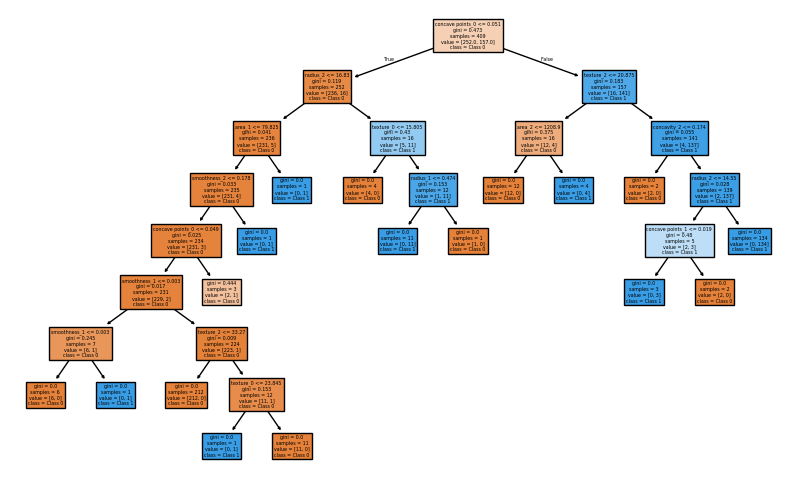

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=25, min_samples_split=5)
clf.fit(patient_X_train, patient_y_train)
print(clf.score(patient_X_val, patient_y_val))

# Plot Decision Tree directly in Jupyter
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=patient_X.columns, class_names=['Class 0', 'Class 1'])
plt.show()


In [ ]:
##

## Random Forest

In [8]:
from randomforest_classifier import *

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(patient_X_train, patient_y_train)

# Make predictions on the test set
y_pred = rf_model.predict(patient_X_val)
# Evaluate the model
accuracy = accuracy_score(patient_y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(patient_y_val, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(patient_y_val, y_pred))


Accuracy: 0.9612

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        65
           1       0.95      0.95      0.95        38

    accuracy                           0.96       103
   macro avg       0.96      0.96      0.96       103
weighted avg       0.96      0.96      0.96       103


Confusion Matrix:
[[63  2]
 [ 2 36]]


In [9]:
param = {
    'n_estimators': [25, 75, 150, 225, 300],  
    'min_samples_split': [2, 5, 10], 
    'criterion' : ["gini", "entropy", "log_loss"]
}

randomforest_model = best_randomforest(patient_X, patient_y, param)

y_pred = randomforest_model.predict(patient_X_test)

accuracy, conf_matrix = evaluate_model(patient_y_test, y_pred, "Random Forest")

Fitting 5 folds for each of 45 candidates, totalling 225 fits

Best Hyperparameters selected are: {'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 300}

Accuracy of Random Forest: 0.9649122807017544

Confusion Matrix for Random Forest:
[[39  1]
 [ 1 16]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.94      0.94      0.94        17

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



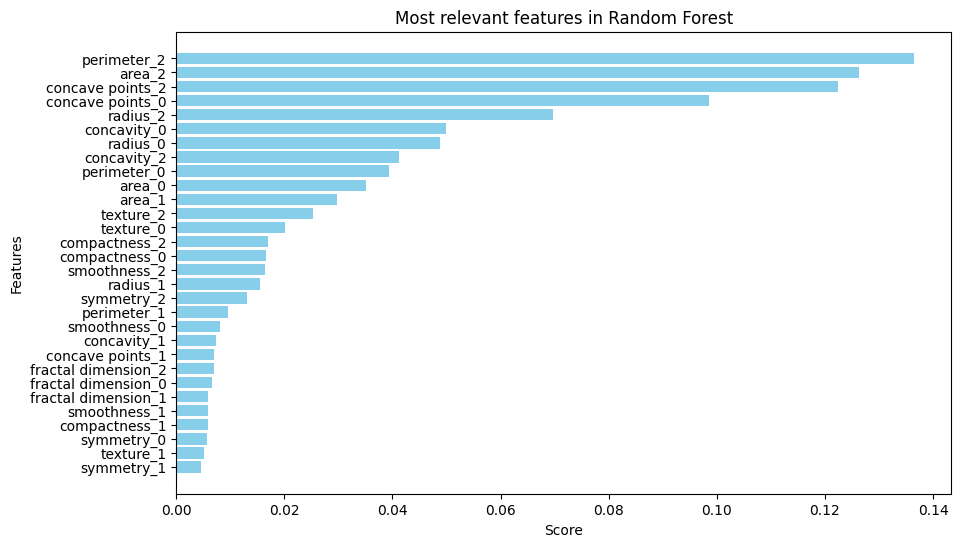

In [22]:
feature_importances = randomforest_model.feature_importances_
importance_df = pd.DataFrame({'Feature': patient_X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis() 
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Score")
plt.ylabel("Features")
plt.title("Most relevant features in Random Forest")
plt.show()

In [26]:
importance_df

,Feature,Importance
22,perimeter_2,0.136548
23,area_2,0.126271
27,concave points_2,0.122447
7,concave points_0,0.098506
20,radius_2,0.069647
6,concavity_0,0.049877
0,radius_0,0.048708
26,concavity_2,0.041292
2,perimeter_0,0.039418
3,area_0,0.035152


## possible third approach

In [29]:
import numpy as np
import random
from copy import deepcopy
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# -------------------------------
# Helper Functions for GA
# -------------------------------

def initialize_population(pop_size, chrom_length):
    """Initialize a population of individuals with random genes in [0,1]."""
    return [np.random.rand(chrom_length) for _ in range(pop_size)]

def uniform_crossover(parent1, parent2):
    """Perform uniform crossover between two parents."""
    child1 = parent1.copy()
    child2 = parent2.copy()
    for i in range(len(parent1)):
        if random.random() < 0.5:
            child1[i], child2[i] = child2[i], child1[i]
    return child1, child2

def mutate(individual, mutation_rate, sigma=0.1):
    """Mutate an individual by adding Gaussian noise to each gene with a given probability."""
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] += np.random.normal(0, sigma)
            # Clip gene to [0,1]
            individual[i] = np.clip(individual[i], 0.0, 1.0)

def tournament_selection(population, fitnesses, tournament_size):
    """Select an individual using tournament selection."""
    selected = random.sample(list(zip(population, fitnesses)), tournament_size)
    selected.sort(key=lambda x: x[1], reverse=True)  # higher fitness is better
    return deepcopy(selected[0][0])

# -------------------------------
# GA-Based Rule-Based Classifier
# -------------------------------

class GARuleBasedClassifier:
    def __init__(self, n_rules, n_features, n_classes, feature_ranges):
        """
        Parameters:
            n_rules: Number of rules in the rule set.
            n_features: Number of features in the data.
            n_classes: Number of target classes.
            feature_ranges: List of (min, max) tuples for each feature.
        """
        self.n_rules = n_rules
        self.n_features = n_features
        self.n_classes = n_classes
        self.feature_ranges = feature_ranges
        # Each rule has: for each feature -> (use_flag, operator, threshold) and then one gene for predicted class.
        self.rule_length = n_features * 3 + 1
        self.chromosome_length = self.n_rules * self.rule_length
        self.best_individual = None  # best chromosome after GA
        self.default_class = None  # majority class in training data

    def _rule_matches(self, rule, x):
        """
        Check if a rule fires on a single sample x.
        The rule is a vector of length (n_features*3 + 1); the last gene encodes the predicted class.
        """
        for i in range(self.n_features):
            # Extract genes for feature i
            base = 3 * i
            use_flag = 1 if rule[base] >= 0.5 else 0
            if use_flag:
                op = '>' if rule[base + 1] >= 0.5 else '<='
                thresh_norm = rule[base + 2]  # normalized threshold in [0,1]
                fmin, fmax = self.feature_ranges[i]
                threshold = fmin + thresh_norm * (fmax - fmin)
                # Check condition on feature i
                if op == '<=' and not (x[i] <= threshold):
                    return False
                if op == '>' and not (x[i] > threshold):
                    return False
        return True

    def _predict_individual(self, individual, X):
        """
        Predict labels for dataset X using the rule set encoded in the individual.
        """
        y_pred = []
        for x in X:
            predicted = None
            # Iterate over rules in order
            for r in range(self.n_rules):
                start = r * self.rule_length
                end = start + self.rule_length
                rule = individual[start:end]
                if self._rule_matches(rule, x):
                    # Decode predicted class from the last gene of the rule
                    pred = int(round(rule[-1] * (self.n_classes - 1)))
                    pred = np.clip(pred, 0, self.n_classes - 1)
                    predicted = pred
                    break
            # If no rule fires, return default class
            if predicted is None:
                predicted = self.default_class
            y_pred.append(predicted)
        return np.array(y_pred)

    def _fitness(self, individual, X, y):
        """Fitness is measured as classification accuracy on (X, y)."""
        y_pred = self._predict_individual(individual, X)
        return accuracy_score(y, y_pred)

    def fit(self, X, y, pop_size=50, generations=50, tournament_size=3, mutation_rate=0.1, crossover_rate=0.7):
        """
        Run the genetic algorithm to optimize the rule set.
        """
        # Store the majority class to use as default when no rule fires.
        self.default_class = Counter(y).most_common(1)[0][0]

        # Initialize population
        population = initialize_population(pop_size, self.chromosome_length)
        # Evaluate initial fitnesses
        fitnesses = [self._fitness(ind, X, y) for ind in population]
        best_fitness = max(fitnesses)
        best_ind = deepcopy(population[np.argmax(fitnesses)])
        print(f"Initial best fitness: {best_fitness:.4f}")

        # GA loop
        for gen in range(generations):
            new_population = []
            while len(new_population) < pop_size:
                # Select parents via tournament selection
                parent1 = tournament_selection(population, fitnesses, tournament_size)
                parent2 = tournament_selection(population, fitnesses, tournament_size)
                # Crossover
                if random.random() < crossover_rate:
                    child1, child2 = uniform_crossover(parent1, parent2)
                else:
                    child1, child2 = deepcopy(parent1), deepcopy(parent2)
                # Mutation
                mutate(child1, mutation_rate)
                mutate(child2, mutation_rate)
                new_population.extend([child1, child2])
            # If population size is odd, trim the last extra individual
            if len(new_population) > pop_size:
                new_population = new_population[:pop_size]
            # Update population and evaluate fitness
            population = new_population
            fitnesses = [self._fitness(ind, X, y) for ind in population]
            cur_best = max(fitnesses)
            if cur_best > best_fitness:
                best_fitness = cur_best
                best_ind = deepcopy(population[np.argmax(fitnesses)])
            print(f"Generation {gen+1:02d} best fitness: {cur_best:.4f}")
        self.best_individual = best_ind
        print(f"GA optimization complete. Best fitness: {best_fitness:.4f}")

    def predict(self, X):
        """Predict labels for X using the optimized rule set."""
        if self.best_individual is None:
            raise ValueError("The classifier has not been fitted yet.")
        return self._predict_individual(self.best_individual, X)

    def print_rules(self):
        """Print a human-readable version of the rules."""
        if self.best_individual is None:
            print("No rules to display; the model is not trained yet.")
            return
        print("Optimized Rules (in order):")
        for r in range(self.n_rules):
            start = r * self.rule_length
            end = start + self.rule_length
            rule = self.best_individual[start:end]
            conditions = []
            for i in range(self.n_features):
                base = 3 * i
                use_flag = rule[base] >= 0.5
                if use_flag:
                    op = '>' if rule[base + 1] >= 0.5 else '<='
                    fmin, fmax = self.feature_ranges[i]
                    threshold = fmin + rule[base + 2] * (fmax - fmin)
                    conditions.append(f"Feature_{i} {op} {threshold:.2f}")
            pred = int(round(rule[-1] * (self.n_classes - 1)))
            pred = np.clip(pred, 0, self.n_classes - 1)
            if conditions:
                cond_str = " AND ".join(conditions)
                print(f"Rule {r+1}: IF {cond_str} THEN class = {pred}")
            else:
                print(f"Rule {r+1}: (No conditions) Predict class = {pred}")

# -------------------------------
# Example Usage
# -------------------------------

if __name__ == "__main__":
    # Use the Iris dataset for demonstration
    
    X_train = patient_X_train.to_numpy()
    y_train = patient_y_train.to_numpy()
    X_test = patient_X_test.to_numpy()
    y_test = patient_y_test.to_numpy()
    n_features = X_train.shape[1]
    n_classes = len(np.unique(y_train))
    
    # Determine the range (min, max) for each feature
    feature_ranges = []
    for i in range(n_features):
        fmin, fmax = X_train[:, i].min(), X_train[:, i].max()
        feature_ranges.append((fmin, fmax))
    
    # Create and train the GA-based rule-based classifier
    n_rules = 5  # Number of rules in our classifier
    classifier = GARuleBasedClassifier(n_rules, n_features, n_classes, feature_ranges)
    classifier.fit(X_train, y_train, pop_size=50, generations=30, tournament_size=3, mutation_rate=0.1, crossover_rate=0.7)
    
    # Display the optimized rules
    classifier.print_rules()
    
    # Evaluate on the test set
    y_pred = classifier.predict(X_test)
    print("\nTest Accuracy:", accuracy_score(y_test, y_pred))


Initial best fitness: 0.6161
Generation 01 best fitness: 0.6479
Generation 02 best fitness: 0.6528
Generation 03 best fitness: 0.6528
Generation 04 best fitness: 0.6553
Generation 05 best fitness: 0.7139
Generation 06 best fitness: 0.7090
Generation 07 best fitness: 0.6944
Generation 08 best fitness: 0.6919
Generation 09 best fitness: 0.7213
Generation 10 best fitness: 0.7188
Generation 11 best fitness: 0.7628
Generation 12 best fitness: 0.7702
Generation 13 best fitness: 0.7775
Generation 14 best fitness: 0.8875
Generation 15 best fitness: 0.8875
Generation 16 best fitness: 0.8851
Generation 17 best fitness: 0.8924
Generation 18 best fitness: 0.8900
Generation 19 best fitness: 0.8949
Generation 20 best fitness: 0.8924
Generation 21 best fitness: 0.8949
Generation 22 best fitness: 0.8998
Generation 23 best fitness: 0.9046
Generation 24 best fitness: 0.9046
Generation 25 best fitness: 0.9046
Generation 26 best fitness: 0.8949
Generation 27 best fitness: 0.8998
Generation 28 best fitness

In [30]:
classifier.print_rules()

Optimized Rules (in order):
Rule 1: IF Feature_0 > 16.54 AND Feature_1 > 29.45 AND Feature_2 <= 165.38 AND Feature_4 > 0.11 AND Feature_5 > 0.26 AND Feature_6 <= 0.36 AND Feature_7 <= 0.09 AND Feature_8 > 0.11 AND Feature_9 <= 0.06 AND Feature_11 <= 2.50 AND Feature_12 <= 16.89 AND Feature_14 > 0.02 AND Feature_15 > 0.04 AND Feature_18 <= 0.02 AND Feature_22 > 174.59 AND Feature_23 <= 2477.57 AND Feature_25 > 0.81 AND Feature_26 <= 0.51 AND Feature_27 <= 0.09 THEN class = 1
Rule 2: IF Feature_3 <= 2501.00 AND Feature_5 > 0.02 AND Feature_12 > 1.55 AND Feature_16 <= 0.18 AND Feature_18 > 0.01 AND Feature_19 <= 0.01 AND Feature_20 > 15.43 AND Feature_21 <= 48.02 AND Feature_24 > 0.11 THEN class = 1
Rule 3: IF Feature_0 <= 17.44 AND Feature_2 > 66.43 AND Feature_4 > 0.12 AND Feature_6 <= 0.17 AND Feature_8 > 0.30 AND Feature_9 > 0.05 AND Feature_10 <= 2.81 AND Feature_12 > 7.91 AND Feature_13 > 446.91 AND Feature_14 > 0.03 AND Feature_17 <= 0.01 AND Feature_26 > 1.25 AND Feature_27 <= 0.1

## trained rule based classifier

In [32]:
patient_y_train.value_counts().index.tolist()

X = patient_X_train.to_numpy()
y = patient_y_train.to_numpy()
X[np.where(y == 1)]

array([[1.566e+01, 2.320e+01, 1.102e+02, ..., 2.462e-01, 3.277e-01,
        1.019e-01],
       [2.047e+01, 2.067e+01, 1.347e+02, ..., 1.613e-01, 3.220e-01,
        6.386e-02],
       [2.116e+01, 2.304e+01, 1.372e+02, ..., 2.009e-01, 2.822e-01,
        7.526e-02],
       ...,
       [1.900e+01, 1.891e+01, 1.234e+02, ..., 1.218e-01, 2.841e-01,
        6.541e-02],
       [1.537e+01, 2.276e+01, 1.002e+02, ..., 1.476e-01, 2.556e-01,
        6.828e-02],
       [1.396e+01, 1.705e+01, 9.143e+01, ..., 1.374e-01, 3.068e-01,
        7.957e-02]])

In [38]:
X[50, 0]

13.85

In [ ]:
class IncrementalRuleBasedClassifier:

    def __init__(self, min_support=5, coverage_threshold=0.5, improvement_threshold=0.05):

        self.T = None
        self.R = []
        self.A = None
        self.default_class = None
        self.classes = None  
        self.mapping = None

        self.min_support = min_support
        self.coverage_threshold = coverage_threshold
        self.improvement_threshold = improvement_threshold
           
    def fit(self, X, y):
        
        self.mapping = {i:name for i, name in enumerate(X.columns)}

        y1 = y.value_counts().index.tolist()
        self.classes = y.unique()
        self.default_class = y1[0]

        self.T = pd.concat([X, y], axis=1).to_numpy()

        X = X.to_numpy()
        y = y.to_numpy()
        new_rules = []
        
        for c in y1:

            while self.T[self.T[:, -1] == c].shape[0] > (1 - self.coverage_threshold) * y.value_counts()[c]:
                
                rule = self._create_rule(c)

                if rule is None:
                    break

                new_rules.append(rule) 
                self.T = self.T[np.logical_not(_rule_coverage(rule))]

        rules = _remove_redundant_rules(new_rules)
        self.R = new_rules


                
                
                
        



    def _create_rule(self, c):
        
        pass

    def _rule_coverage(self, rule):
        
        pass

    def _remove_redundant_rules(self, rules):

        pass


    def predict(self, X):

        pass

    def score(self, X, y):

        pass


In [40]:
import numpy as np
import pandas as pd

class WeightedIncrementalRuleBasedClassifier:
    def __init__(self, min_support=5, coverage_threshold=0.5, improvement_threshold=0.05, class_weights=None):
        """
        Parameters:
            min_support: Minimum number of records that a candidate rule must cover.
            coverage_threshold: For each class, stop generating rules when at least 
                                (coverage_threshold * 100)% of its training records have been covered.
            improvement_threshold: Minimum reduction in error (1 - fraction(target))
                                   required to add a new condition to the rule.
            class_weights: A dictionary mapping each class to its weight. 
                           Example: {0: 1.0, 1: 2.0, 2: 1.5}. If None, equal weights are assumed.
        """
        self.min_support = min_support
        self.coverage_threshold = coverage_threshold
        self.improvement_threshold = improvement_threshold
        self.class_weights = class_weights
        self.rules = []         # Will hold tuples of (rule, predicted_class)
        self.default_class = None
        self.classes = None     # List of classes encountered during training

    def fit(self, X, y):
        """
        Generate rules incrementally from the training data.
        
        Parameters:
            X: pandas DataFrame of features.
            y: pandas Series or array-like target labels.
        """
        # Combine features and target for easier processing
        data = X.copy()
        data['target'] = y

        # Order classes by relevance (here: frequency)
        class_counts = data['target'].value_counts()
        ordered_classes = class_counts.index.tolist()
        self.classes = ordered_classes

        # If no class weights provided, assign equal weight (1.0) to each class.
        if self.class_weights is None:
            self.class_weights = {cls: 1.0 for cls in ordered_classes}

        R = []         # The set of generated rules
        T = data.copy()  # Working copy of training records

        # For each class (in order of relevance)
        for current_class in ordered_classes:
            original_count = class_counts[current_class]
            # Continue generating rules until enough records for current_class are covered.
            while T[T['target'] == current_class].shape[0] > (1 - self.coverage_threshold) * original_count:
                # Generate a rule for current_class using the general-to-specific approach.
                rule = self._generate_rule_for_class(T, current_class, X.columns)
                if rule is None:
                    break  # No further improvement possible for this class.
                # Add the rule (with its associated class) to the rule set.
                R.append((rule, current_class))
                # Remove records covered by this rule from T.
                T = T[~T.apply(lambda row: self._rule_matches(rule, row), axis=1)]
        self.rules = R
        self.default_class = ordered_classes[0]
        return self

    def _generate_rule_for_class(self, T, target_class, features):
        """
        Generates a candidate rule for target_class using a general-to-specific approach.
        
        The process starts with an empty rule (covering all records) and iteratively adds one 
        condition at a time. At each step, the candidate condition that yields the best improvement 
        (i.e., reduction in error defined as 1 - fraction of records that are of target_class) is selected.
        The procedure stops when no candidate condition provides an improvement of at least 
        'improvement_threshold'.
        
        Parameters:
            T: DataFrame containing current training records (including 'target').
            target_class: The class for which to generate a rule.
            features: List of feature names.
            
        Returns:
            A rule as a list of conditions [(feature, operator, threshold), ...] or None if no rule is found.
        """
        # Start with an empty rule (i.e., no conditions).
        current_rule = []
        # Initially, the rule covers all records in T.
        current_covered = T.copy()
        current_error = self._error(current_covered, target_class)
        
        while True:
            best_candidate = None
            best_candidate_error = current_error
            # Iterate over all features and all candidate thresholds in the current covered set.
            for feature in features:
                unique_values = sorted(current_covered[feature].unique())
                if len(unique_values) < 2:
                    continue  # Skip if there is not enough variability.
                for threshold in unique_values:
                    for op in ['<=', '>']:
                        candidate_condition = (feature, op, threshold)
                        # Create a candidate rule by adding this condition.
                        candidate_rule = current_rule + [candidate_condition]
                        # Filter current_covered further using only the new condition.
                        if op == '<=':
                            candidate_covered = current_covered[current_covered[feature] <= threshold]
                        else:
                            candidate_covered = current_covered[current_covered[feature] > threshold]
                        if candidate_covered.shape[0] < self.min_support:
                            continue
                        candidate_error = self._error(candidate_covered, target_class)
                        # Check if this condition yields a better (lower) error.
                        if candidate_error < best_candidate_error:
                            best_candidate_error = candidate_error
                            best_candidate = candidate_condition
            # If a candidate condition was found that improves error by at least the threshold, add it.
            if best_candidate is not None and (current_error - best_candidate_error) >= self.improvement_threshold:
                current_rule.append(best_candidate)
                feature, op, threshold = best_candidate
                if op == '<=':
                    current_covered = current_covered[current_covered[feature] <= threshold]
                else:
                    current_covered = current_covered[current_covered[feature] > threshold]
                current_error = best_candidate_error
            else:
                break  # No candidate condition meets the improvement criterion.
        
        # Return the rule if at least one condition was added.
        return current_rule if current_rule else None

    def _error(self, data, target_class):
        """
        Compute the error rate for the candidate rule with respect to target_class.
        
        Error is defined as 1 - (fraction of records in data that belong to target_class).
        If no records are covered, return 1.0.
        """
        if data.shape[0] == 0:
            return 1.0
        p = (data['target'] == target_class).mean()
        return 1 - p

    def _rule_matches(self, rule, row):
        """
        Check if a record (row) satisfies all conditions in a rule.
        
        Parameters:
            rule: A list of conditions (each condition is a tuple: (feature, operator, threshold)).
            row: A pandas Series representing a record.
            
        Returns:
            True if the row meets all conditions; False otherwise.
        """
        for feature, op, threshold in rule:
            if op == '<=':
                if not row[feature] <= threshold:
                    return False
            elif op == '>':
                if not row[feature] > threshold:
                    return False
        return True

    def predict(self, X):
        """
        Classify each record in X using a weighted vote mechanism.
        
        For each test record:
          - Initialize a vote mapping F (one entry per class, starting at 0).
          - For every rule in the generated rule set, if the rule covers the record,
            add the pre-defined weight (from class_weights) for that rule's predicted class to F.
          - Output the class with the highest vote. If no rule fires, use the default class.
        
        Parameters:
            X: pandas DataFrame of features.
            
        Returns:
            A numpy array of predicted class labels.
        """
        predictions = []
        for _, row in X.iterrows():
            votes = {cls: 0 for cls in self.classes}
            for rule, predicted_class in self.rules:
                if self._rule_matches(rule, row):
                    votes[predicted_class] += self.class_weights.get(predicted_class, 1.0)
            if all(vote == 0 for vote in votes.values()):
                predictions.append(self.default_class)
            else:
                predicted = max(votes, key=votes.get)
                predictions.append(predicted)
        return np.array(predictions)

    def print_rules(self):
        """
        Print the generated rules in a human-readable format.
        """
        print("Generated Rules (unordered):")
        for idx, (rule, predicted_class) in enumerate(self.rules, 1):
            conditions = " AND ".join([f"{feat} {op} {threshold:.2f}" for feat, op, threshold in rule])
            print(f"Rule {idx}: IF {conditions} THEN class = {predicted_class}")
        print(f"Default rule: ELSE predict class = {self.default_class}")


# -------------------------------
# Example Usage
# -------------------------------
if __name__ == "__main__":
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, classification_report

    # Optionally, define class weights (e.g., giving more weight to a specific class)

    # Create and train the classifier
    classifier = WeightedIncrementalRuleBasedClassifier(
        min_support=5,
        coverage_threshold=0.8,
        improvement_threshold=0.05
    )
    classifier.fit(patient_X_train, patient_y_train)

    # Print the generated rules
    classifier.print_rules()

    # Predict on the test set using weighted voting
    y_pred = classifier.predict(patient_X_test)

    # Evaluate the classifier
    print("\nTest Accuracy:", accuracy_score(patient_y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(patient_y_test, y_pred))


Generated Rules (unordered):
Rule 1: IF radius_0 <= 8.22 THEN class = 0
Rule 2: IF radius_0 <= 8.73 THEN class = 0
Rule 3: IF radius_0 <= 9.04 THEN class = 0
Rule 4: IF radius_0 <= 9.40 THEN class = 0
Rule 5: IF radius_0 <= 9.68 THEN class = 0
Rule 6: IF radius_0 <= 9.78 THEN class = 0
Rule 7: IF radius_0 <= 10.05 THEN class = 0
Rule 8: IF radius_0 <= 10.26 THEN class = 0
Rule 9: IF radius_0 <= 10.49 THEN class = 0
Rule 10: IF radius_0 <= 10.65 THEN class = 0
Rule 11: IF radius_0 <= 10.80 THEN class = 0
Rule 12: IF radius_0 <= 10.94 THEN class = 0
Rule 13: IF texture_0 <= 12.17 THEN class = 0
Rule 14: IF texture_0 <= 13.08 THEN class = 0
Rule 15: IF texture_0 <= 13.32 THEN class = 0
Rule 16: IF texture_0 <= 13.66 THEN class = 0
Rule 17: IF texture_0 <= 13.98 THEN class = 0
Rule 18: IF texture_0 <= 14.23 THEN class = 0
Rule 19: IF perimeter_0 <= 70.67 THEN class = 0
Rule 20: IF perimeter_0 <= 71.30 THEN class = 0
Rule 21: IF smoothness_0 <= 0.07 THEN class = 0
Rule 22: IF smoothness_0 <

In [42]:
import numpy as np
import pandas as pd

class WeightedIncrementalRuleBasedClassifier:
    def __init__(self, min_support=5, coverage_threshold=0.5, improvement_threshold=0.05, class_weights=None):
        """
        Parameters:
            min_support: Minimum number of records that a candidate rule must cover.
            coverage_threshold: For each class, stop generating rules when at least 
                                (coverage_threshold * 100)% of its training records have been covered.
            improvement_threshold: Minimum drop in entropy required to add a new condition.
            class_weights: A dictionary mapping each class to its weight. 
                           Example: {0: 1.0, 1: 2.0, 2: 1.5}. If None, equal weights are assumed.
        """
        self.min_support = min_support
        self.coverage_threshold = coverage_threshold
        self.improvement_threshold = improvement_threshold
        self.class_weights = class_weights
        self.rules = []         # Will hold tuples of (rule, predicted_class)
        self.default_class = None
        self.classes = None     # List of classes encountered during training

    def fit(self, X, y):
        """
        Generate rules incrementally from the training data.
        
        Parameters:
            X: pandas DataFrame of features.
            y: pandas Series or array-like target labels.
        """
        # Combine features and target for easier processing.
        data = X.copy()
        data['target'] = y

        # Order classes by relevance (here: frequency).
        class_counts = data['target'].value_counts()
        ordered_classes = class_counts.index.tolist()
        self.classes = ordered_classes

        # If no class weights provided, assign equal weight (1.0) to each class.
        if self.class_weights is None:
            self.class_weights = {cls: 1.0 for cls in ordered_classes}

        R = []         # The set of generated rules.
        T = data.copy()  # Working copy of training records.

        # For each class (in order of relevance).
        for current_class in ordered_classes:
            original_count = class_counts[current_class]
            # Continue generating rules until enough records for current_class are covered.
            while T[T['target'] == current_class].shape[0] > (1 - self.coverage_threshold) * original_count:
                # Generate a rule for current_class using the general-to-specific approach.
                rule = self._generate_rule_for_class(T, current_class, X.columns)
                if rule is None:
                    break  # No further improvement possible for this class.
                # Add the rule (with its associated class) to the rule set.
                R.append((rule, current_class))
                # Remove records covered by this rule from T.
                T = T[~T.apply(lambda row: self._rule_matches(rule, row), axis=1)]
        self.rules = R
        self.default_class = ordered_classes[0]
        return self

    def _entropy(self, data, target_class):
        """
        Compute the binary entropy for the candidate subset with respect to target_class.
        
        Let p be the fraction of records in data that belong to target_class.
        Entropy H is defined as:
            H = - p * log2(p) - (1 - p) * log2(1 - p)
        If p is 0 or 1, entropy is 0.
        If no records are covered, returns 1.0.
        """
        if data.shape[0] == 0:
            return 1.0
        p = (data['target'] == target_class).mean()
        # Handle edge cases.
        if p == 0 or p == 1:
            return 0.0
        return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

    def _generate_rule_for_class(self, T, target_class, features):
        """
        Generates a candidate rule for target_class using a general-to-specific approach.
        
        Start with an empty rule and iteratively add one condition at a time. At each step,
        select the candidate condition that yields the greatest drop in entropy. Stop when 
        no candidate condition reduces entropy by at least improvement_threshold.
        
        Parameters:
            T: DataFrame containing current training records (including 'target').
            target_class: The class for which to generate a rule.
            features: List of feature names.
            
        Returns:
            A rule as a list of conditions [(feature, operator, threshold), ...] or None if no rule is found.
        """
        # Start with an empty rule (i.e., no conditions).
        current_rule = []
        # Initially, the rule covers all records in T.
        current_covered = T.copy()
        current_entropy = self._entropy(current_covered, target_class)
        
        while True:
            best_candidate = None
            best_candidate_entropy = current_entropy
            # Iterate over all features and all candidate thresholds in the current covered set.
            for feature in features:
                unique_values = sorted(current_covered[feature].unique())
                if len(unique_values) < 2:
                    continue  # Skip if there is not enough variability.
                for threshold in unique_values:
                    for op in ['<=', '>']:
                        candidate_condition = (feature, op, threshold)
                        # Create a candidate rule by adding this condition.
                        candidate_rule = current_rule + [candidate_condition]
                        # Filter current_covered further using the new condition.
                        if op == '<=':
                            candidate_covered = current_covered[current_covered[feature] <= threshold]
                        else:
                            candidate_covered = current_covered[current_covered[feature] > threshold]
                        if candidate_covered.shape[0] < self.min_support:
                            continue
                        candidate_entropy = self._entropy(candidate_covered, target_class)
                        # Check if this condition yields a lower (better) entropy.
                        if candidate_entropy < best_candidate_entropy:
                            best_candidate_entropy = candidate_entropy
                            best_candidate = candidate_condition
            # Check if a candidate condition was found that improves entropy sufficiently.
            if best_candidate is not None and (current_entropy - best_candidate_entropy) >= self.improvement_threshold:
                current_rule.append(best_candidate)
                feature, op, threshold = best_candidate
                if op == '<=':
                    current_covered = current_covered[current_covered[feature] <= threshold]
                else:
                    current_covered = current_covered[current_covered[feature] > threshold]
                current_entropy = best_candidate_entropy
            else:
                break  # No candidate condition meets the improvement criterion.
        
        # Return the rule if at least one condition was added; otherwise, return None.
        return current_rule if current_rule else None

    def _rule_matches(self, rule, row):
        """
        Check if a record (row) satisfies all conditions in a rule.
        
        Parameters:
            rule: A list of conditions (each condition is a tuple: (feature, operator, threshold)).
            row: A pandas Series representing a record.
            
        Returns:
            True if the row meets all conditions; False otherwise.
        """
        for feature, op, threshold in rule:
            if op == '<=':
                if not row[feature] <= threshold:
                    return False
            elif op == '>':
                if not row[feature] > threshold:
                    return False
        return True

    def predict(self, X):
        """
        Classify each record in X using a weighted vote mechanism.
        
        For each test record:
          - Initialize a vote mapping F (one entry per class, starting at 0).
          - For every rule in the generated rule set, if the rule covers the record,
            add the pre-defined weight (from class_weights) for that rule's predicted class to F.
          - Output the class with the highest vote. If no rule fires, use the default class.
        
        Parameters:
            X: pandas DataFrame of features.
            
        Returns:
            A numpy array of predicted class labels.
        """
        predictions = []
        for _, row in X.iterrows():
            votes = {cls: 0 for cls in self.classes}
            for rule, predicted_class in self.rules:
                if self._rule_matches(rule, row):
                    votes[predicted_class] += self.class_weights.get(predicted_class, 1.0)
            if all(vote == 0 for vote in votes.values()):
                predictions.append(self.default_class)
            else:
                predicted = max(votes, key=votes.get)
                predictions.append(predicted)
        return np.array(predictions)

    def print_rules(self):
        """
        Print the generated rules in a human-readable format.
        """
        print("Generated Rules (unordered):")
        for idx, (rule, predicted_class) in enumerate(self.rules, 1):
            conditions = " AND ".join([f"{feat} {op} {threshold:.2f}" for feat, op, threshold in rule])
            print(f"Rule {idx}: IF {conditions} THEN class = {predicted_class}")
        print(f"Default rule: ELSE predict class = {self.default_class}")

        
# -------------------------------
# Example Usage
# -------------------------------
if __name__ == "__main__":
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, classification_report

    # Create and train the classifier.
    classifier = WeightedIncrementalRuleBasedClassifier(
        min_support=5,
        coverage_threshold=0.85,
        improvement_threshold=0.05,
    )
    classifier.fit(patient_X_train, patient_y_train)

    # Print the generated rules.
    classifier.print_rules()

    # Predict on the test set using weighted voting.
    y_pred = classifier.predict(patient_X_test)

    # Evaluate the classifier.
    print("\nTest Accuracy:", accuracy_score(patient_y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(patient_y_test, y_pred))


Generated Rules (unordered):
Rule 1: IF radius_0 <= 8.22 THEN class = 0
Rule 2: IF radius_0 <= 8.73 THEN class = 0
Rule 3: IF radius_0 <= 9.04 THEN class = 0
Rule 4: IF radius_0 <= 9.40 THEN class = 0
Rule 5: IF radius_0 <= 9.68 THEN class = 0
Rule 6: IF radius_0 <= 9.78 THEN class = 0
Rule 7: IF radius_0 <= 10.05 THEN class = 0
Rule 8: IF radius_0 <= 10.26 THEN class = 0
Rule 9: IF radius_0 <= 10.49 THEN class = 0
Rule 10: IF radius_0 <= 10.65 THEN class = 0
Rule 11: IF radius_0 <= 10.80 THEN class = 0
Rule 12: IF radius_0 <= 10.94 THEN class = 0
Rule 13: IF radius_0 > 17.85 THEN class = 0
Rule 14: IF texture_0 <= 12.17 THEN class = 0
Rule 15: IF texture_0 <= 13.08 THEN class = 0
Rule 16: IF texture_0 <= 13.32 THEN class = 0
Rule 17: IF radius_0 > 16.84 THEN class = 0
Rule 18: IF texture_0 <= 13.66 THEN class = 0
Rule 19: IF texture_0 <= 13.98 THEN class = 0
Rule 20: IF texture_0 <= 14.23 THEN class = 0
Rule 21: IF texture_0 <= 14.76 THEN class = 0
Rule 22: IF texture_0 <= 14.93 THEN 

/opt/anaconda3/envs/designai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/designai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/designai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [46]:
import numpy as np
from collections import Counter

class DecisionTreeClassifier:
    class Node:
        def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None):
            """
            A Node in the decision tree.
            If value is not None, this is a leaf node.
            Otherwise, the node splits on the feature at feature_index using threshold.
            """
            self.feature_index = feature_index
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value  # for leaf nodes, store the predicted class

    def __init__(self, max_depth=5, min_samples_split=2):
        """
        Parameters:
            max_depth: maximum depth of the tree.
            min_samples_split: minimum number of samples required to attempt a split.
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        """
        Build the decision tree using training data.
        
        Parameters:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
        """
        self.n_classes = len(np.unique(y))
        self.n_features = X.shape[1]
        self.root = self._grow_tree(X, y)
        return self

    def predict(self, X):
        """
        Predict class labels for samples in X.
        
        Parameters:
            X: numpy array of shape (n_samples, n_features)
            
        Returns:
            preds: numpy array of predicted class labels.
        """
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _gini(self, y):
        """
        Compute the Gini impurity for labels y.
        """
        m = len(y)
        if m == 0:
            return 0
        counts = np.array(list(Counter(y).values()))
        probs = counts / m
        return 1 - np.sum(probs ** 2)

    def _best_split(self, X, y):
        """
        Find the best split for the current node.
        
        Returns:
            best_idx: index of the feature used for splitting.
            best_thr: threshold value for that feature.
        """
        m, n = X.shape
        if m < self.min_samples_split:
            return None, None

        parent_gini = self._gini(y)
        best_gain = 0.0
        best_idx, best_thr = None, None

        for feature_idx in range(n):
            # sort data along selected feature
            sorted_indices = X[:, feature_idx].argsort()
            X_sorted, y_sorted = X[sorted_indices], y[sorted_indices]
            # consider candidate thresholds as midpoints between unique values
            for i in range(1, m):
                if y_sorted[i] == y_sorted[i - 1]:
                    continue
                threshold = (X_sorted[i, feature_idx] + X_sorted[i - 1, feature_idx]) / 2
                # split the dataset
                left_mask = X[:, feature_idx] <= threshold
                y_left = y[left_mask]
                y_right = y[~left_mask]
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                # compute weighted impurity
                gini_left = self._gini(y_left)
                gini_right = self._gini(y_right)
                n_left, n_right = len(y_left), len(y_right)
                gain = parent_gini - (n_left / m) * gini_left - (n_right / m) * gini_right
                if gain > best_gain:
                    best_gain = gain
                    best_idx = feature_idx
                    best_thr = threshold

        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        """
        Recursively build the tree.
        """
        num_samples = X.shape[0]
        num_labels = len(np.unique(y))

        # stopping criteria: if all samples are of the same class
        # or if we reached max_depth or insufficient samples to split
        if depth >= self.max_depth or num_labels == 1 or num_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return self.Node(value=leaf_value)

        # find the best split
        feature_idx, threshold = self._best_split(X, y)
        if feature_idx is None:
            leaf_value = self._most_common_label(y)
            return self.Node(value=leaf_value)

        # split dataset
        left_indices = X[:, feature_idx] <= threshold
        X_left, y_left = X[left_indices], y[left_indices]
        X_right, y_right = X[~left_indices], y[~left_indices]

        # recursively grow the left and right child
        left_node = self._grow_tree(X_left, y_left, depth + 1)
        right_node = self._grow_tree(X_right, y_right, depth + 1)
        return self.Node(feature_index=feature_idx, threshold=threshold, left=left_node, right=right_node)

    def _traverse_tree(self, x, node):
        """
        Traverse the tree to predict the class for a single sample.
        """
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        """
        Return the most common class label in y.
        """
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

# -------------------------------
# Example Usage
# -------------------------------
if __name__ == "__main__":
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, classification_report

    # Load Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Create and train the decision tree classifier
    clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
    clf.fit(patient_X_train.to_numpy(), patient_y_train.to_numpy())

    # Make predictions on the test set
    y_pred = clf.predict(patient_X_test.to_numpy())

    # Evaluate the model
    print("Test Accuracy:", accuracy_score(patient_y_test.to_numpy(), y_pred))
    print("\nClassification Report:")
    print(classification_report(patient_y_test.to_numpy(), y_pred))


Test Accuracy: 0.9473684210526315

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.89      0.94      0.91        17

    accuracy                           0.95        57
   macro avg       0.93      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



In [47]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset and split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Extract rules as text
feature_names = iris.feature_names
rules = export_text(clf, feature_names=feature_names)
print(rules)


|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



In [49]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [50]:
!pip install wittgenstein

## CUSTOM Method using IREP/RIPPER

In [111]:
import wittgenstein as lw

df = pd.concat([patient_X_train, patient_y_train], axis=1)
ripper_clf = lw.IREP() # Or irep_clf = lw.IREP() to build a model using IREP
ripper_clf.fit(patient_X_train, patient_y_train) # Or pass X and y data to .fit
ripper_clf 

prune_precision for rule [concavepoints_2=0.15-0.18] 0.9166666666666666
prune_precision for rule [concavepoints_2=0.18-0.21] 1.0
prune_precision for rule [concavepoints_2=>0.21] 1.0
prune_precision for rule [area_2=926.4-1288.4] 0.8571428571428571
prune_precision for rule [concavepoints_2=0.12-0.15] 0.5454545454545454
prune_precision for rule [texture_0=22.34-24.98^smoothness_0=0.0875-0.0916] None


<IREP(max_total_conds=None, n_discretize_bins=10, max_rule_conds=None, verbosity=0, max_rules=None, prune_size=0.33, random_state=None, alpha=1.0) with fit ruleset>

In [112]:
ripper_clf.out_model()

[[concavepoints_2=0.15-0.18] V
[concavepoints_2=0.18-0.21] V
[concavepoints_2=>0.21] V
[area_2=926.4-1288.4] V
[concavepoints_2=0.12-0.15]]


In [113]:
y_pred = ripper_clf.predict(patient_X_test)

evaluate_model(y_pred, patient_y_test, 'IREP MODEL')


Accuracy of IREP MODEL: 0.9824561403508771

Confusion Matrix for IREP MODEL:
[[39  1]
 [ 0 17]]

Classification Report for IREP MODEL:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.94      1.00      0.97        17

    accuracy                           0.98        57
   macro avg       0.97      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



(0.9824561403508771,
 array([[39,  1],
        [ 0, 17]]))

In [114]:
y_pred

[False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False]

In [95]:
patient_y_test.iloc[0]

0

In [84]:
patient_X_test

,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,fractal dimension_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
204,12.470,18.60,81.09,481.9,0.09965,0.10580,0.080050,0.038210,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.14260,0.23780,0.26710,0.10150,0.3014,0.08750
70,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.108000,0.079510,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.11930,0.23360,0.26870,0.17890,0.2551,0.06589
131,15.460,19.48,101.70,748.9,0.10920,0.12230,0.146600,0.080870,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.15460,0.23940,0.37910,0.15140,0.2837,0.08019
431,12.400,17.68,81.47,467.8,0.10540,0.13160,0.077410,0.027990,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.14500,0.26290,0.24030,0.07370,0.2556,0.09359
540,11.540,14.44,74.65,402.9,0.09984,0.11200,0.067370,0.025940,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.13450,0.21180,0.17970,0.06918,0.2329,0.08134
567,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.351400,0.152000,0.2397,0.07016,...,25.74,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400
369,22.010,21.90,147.20,1482.0,0.10630,0.19540,0.244800,0.150100,0.1824,0.06140,...,27.66,25.80,195.00,2227.0,0.12940,0.38850,0.47560,0.24320,0.2741,0.08574
29,17.570,15.05,115.00,955.1,0.09847,0.11570,0.098750,0.079530,0.1739,0.06149,...,20.01,19.52,134.90,1227.0,0.12550,0.28120,0.24890,0.14560,0.2756,0.07919
81,13.340,15.86,86.49,520.0,0.10780,0.15350,0.116900,0.069870,0.1942,0.06902,...,15.53,23.19,96.66,614.9,0.15360,0.47910,0.48580,0.17080,0.3527,0.10160
477,13.900,16.62,88.97,599.4,0.06828,0.05319,0.022240,0.013390,0.1813,0.05536,...,15.14,21.80,101.20,718.9,0.09384,0.20060,0.13840,0.06222,0.2679,0.07698


In [86]:
data.iloc[131]

malignant                 1.000000
radius_0                 15.460000
texture_0                19.480000
perimeter_0             101.700000
area_0                  748.900000
smoothness_0              0.109200
compactness_0             0.122300
concavity_0               0.146600
concave points_0          0.080870
symmetry_0                0.193100
fractal dimension_0       0.057960
radius_1                  0.474300
texture_1                 0.785900
perimeter_1               3.094000
area_1                   48.310000
smoothness_1              0.006240
compactness_1             0.014840
concavity_1               0.028130
concave points_1          0.010930
symmetry_1                0.013970
fractal dimension_1       0.002461
radius_2                 19.260000
texture_2                26.000000
perimeter_2             124.900000
area_2                 1156.000000
smoothness_2              0.154600
compactness_2             0.239400
concavity_2               0.379100
concave points_2    